## Visualisation

* As we have talked about previously, it can be very difficult to gain insight into data from looking at a table or a mathematical formula.
* Visual presentation of the data/functions often has a much more intuitive appeal to us. Therefore, it makes sense to visualise the data and functions we are working with.

### Pandas

Now that we have just seen basic use of Pandas, let us try visualising data from Pandas.
- Pandas comes with built-in plotting functionality for convenient visualisation.

In [1]:
import pandas as pd

dataset = pd.read_csv('COVID19.csv')  # Example (2020) data from https://www.ssi.dk/aktuelt/sygdomsudbrud/coronavirus
dataset

,Dato,Event,Aldersgruppe,Region,Nye indlagte,Kumulative nye indlagte,Indlagte per dag
0,15-02-2020,Hospitalised,0-59,Nordjylland,0,0,0
1,15-02-2020,Hospitalised,60+,Nordjylland,0,0,0
2,15-02-2020,Hospitalised,0-59,Midtjylland,0,0,0
3,15-02-2020,Hospitalised,60+,Midtjylland,0,0,0
4,15-02-2020,Hospitalised,0-59,Syddanmark,0,0,0
...,...,...,...,...,...,...,...
915,16-05-2020,Hospitalised,60+,Zealand,0,273,17
916,16-05-2020,Hospitalised,0-59,Nordjylland,0,27,1
917,16-05-2020,Hospitalised,60+,Nordjylland,0,74,6
918,16-05-2020,Hospitalised,0-59,Midtjylland,0,95,1


In [2]:
data_elderly = dataset[dataset.Aldersgruppe == '60+']

In [3]:
%matplotlib inline

Pandas' plotting functionality works nicely "out of the box" without further configuraition:

<Axes: >

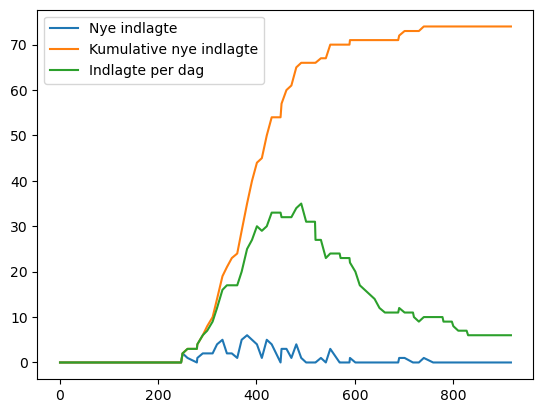

In [4]:
data_elderly[data_elderly.Region == 'Nordjylland'].plot()

- Other types of plots available, such as `scatter`.
- Configuration options to customise plots further.
- See more details in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/04_plotting.html).

## Matplotlib

A classis workhorse package for plotting in Python is Matplotlib.
* Lots of functionality - different plot types etc.
* Many configuration options

**But:**

* Easy to get lost in the configuration details 
* Not so easy to make plots look modern and to achieve a pleasing layout

## Seaborn

As an alternative to Matplotlib, we introduce Seaborn.
- A different plotting package, but based on Matplotlib.
- Basically still Matplotlib generating the graphics underneath.
- An alternative user interface on top that makes it easier to achieve nice-looking plots without a lot of configuration.

- First we are going to see how Seaborn can quite automatically produce nice plots from Pandas data.
- Then we are going to plot an example manually from toy data using Matplotlib.

## Seaborn and Pandas
* Seaborn - a package to easily produce good-looking statistical plots.
* You can still tweak details etc. using Matplotlib functions.
* See https://seaborn.pydata.org/ (comes installed with Anaconda)
* Excellent match for Pandas (which Matplotlib itself is not so great with).

<Axes: xlabel='Dato', ylabel='Nye indlagte'>

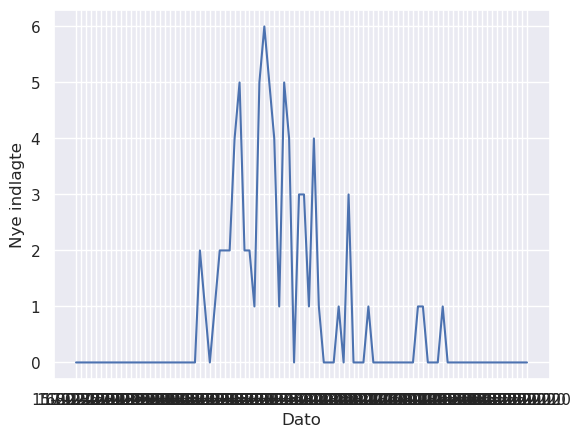

In [5]:
import seaborn as sns

sns.set()
sns.lineplot(x='Dato', y='Nye indlagte', data=data_elderly[data_elderly.Region == 'Nordjylland'], sort=False)

<Axes: xlabel='Dato', ylabel='Kumulative nye indlagte'>

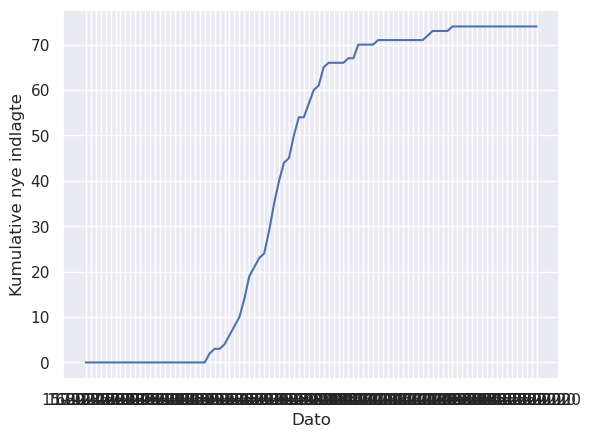

In [6]:
sns.lineplot(x='Dato', y='Kumulative nye indlagte', data=data_elderly[data_elderly.Region == 'Nordjylland'], sort=False)

<Axes: xlabel='Dato', ylabel='Indlagte per dag'>

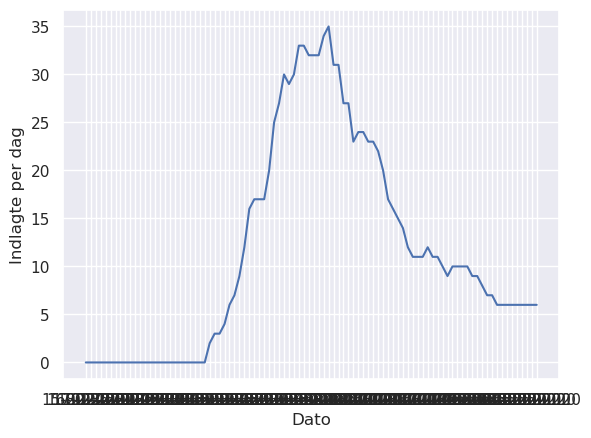

In [7]:
sns.lineplot(x='Dato', y='Indlagte per dag', data=data_elderly[data_elderly.Region == 'Nordjylland'], sort=False)

- Plenty of functionality available to explore in the [Seaborn documentation](http://seaborn.pydata.org/tutorial.html).

## Matplotlib and NumPy

As a simple first plot, let us try plotting the curve
$$y = t^2 \exp(−t^2)$$
for values $t \in [0, 3]$.
* First, generate the points for the function input $t$.
* Second, generate the function values *y* at the generated points *t*.

### First plot

Let us have a look at the code.

Matplotlib is typically imported as

In [15]:
import matplotlib.pyplot as plt
import numpy as np  # For demo data

Define the function

In [22]:
def f(t):
    return t**3*np.exp(-t**3)

Generate the points

In [23]:
t = np.linspace(0, 3, 51) # 51 points btw. 0 and 3
y = f(t)                  # compute all f values

Plot the points

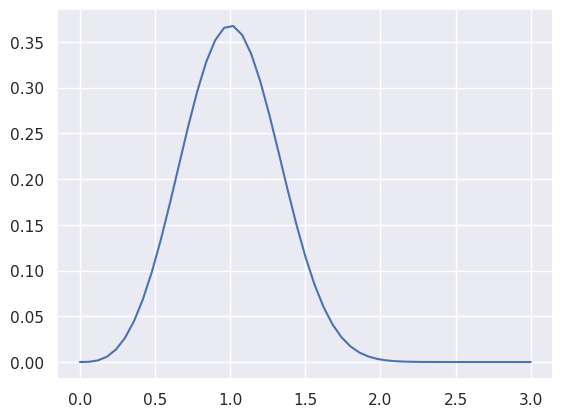

In [24]:
plt.plot(t,y)
plt.savefig('demoplot1.pdf') # produce PDF
plt.savefig('demoplot1.png') # produce PNG

### More features

It works, but the figure is a bit too minimalist.

We need to add more detail to the plot to make it more
informative. We are going to:

* Add axis titles – show which variables are plotted along which axes.
* Add a legend – a list of which function(s) the curve(s) represent(s).
* Adjust the axes to display the data as we want.
* Add a title.
* Plot multiple curves.
* Plot multiple axes in one figure.

As an example, let us define the two functions
$$\begin{align*}
  f_1(t) &= t^2 \exp\left(-t^2\right) & f_2(t) &= t^4 \exp\left(-t^2\right)
\end{align*}$$
for values $t \in [0,3]$.

Let us have a look at the code:

In [26]:
def f1(t):
    return t**2*np.exp(-t**2)

def f2(t):
    return t**2*f1(t)

A bit of set-up...

In [27]:
# Generate the points
t = np.linspace(0, 3, 51)
y1 = f1(t)
y2 = f2(t)
t3 = t[::4]
y3 = f2(t3)

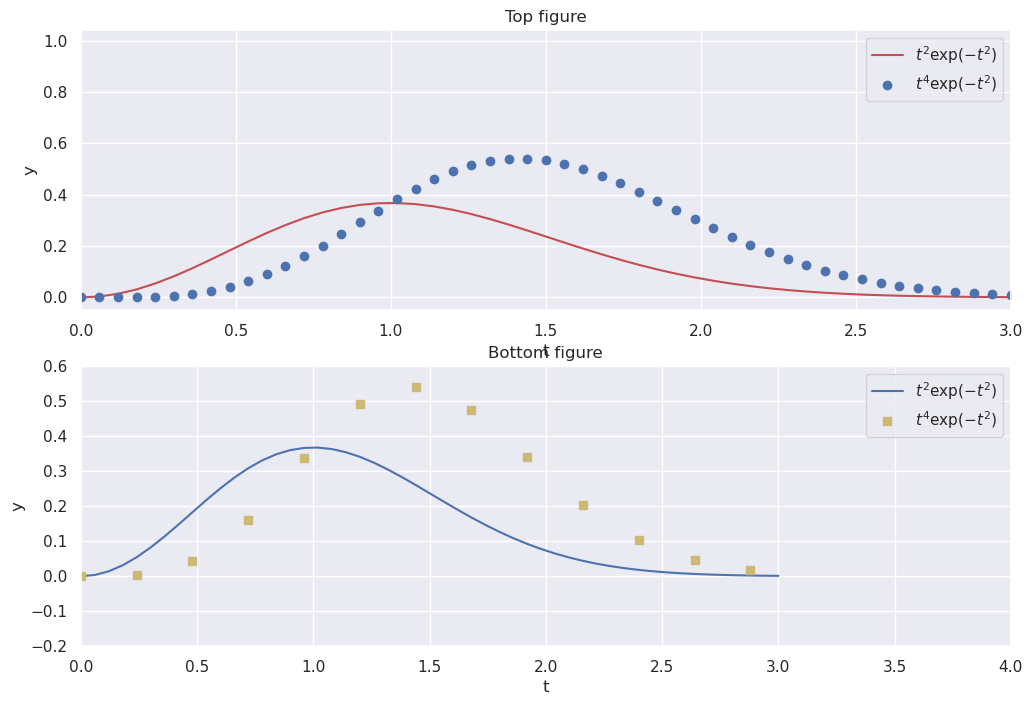

In [28]:
plt.figure(figsize=(12,8)) # Open a figure
plt.subplot(2, 1, 1) # Select the first (sub-)plot
# Plot the points
plt.plot(t, y1, 'r-', label='$t^2 \exp(-t^2)$')
plt.plot(t, y2, 'bo', label='$t^4 \exp(-t^2)$')
plt.xlabel('t'); plt.ylabel('y')
plt.axis([t[0], t[-1], min(y2)-0.05, max(y2)+0.5])
plt.legend(); plt.title('Top figure')
plt.subplot(2, 1, 2)  # Select the second (sub-)plot
# Plot the points
plt.plot(t, y1, 'b-', t3, y3, 'ys')
plt.xlabel('t'); plt.ylabel('y')
plt.axis([0, 4, -0.2, 0.6])
plt.legend(['$t^2 \exp(-t^2)$', '$t^4 \exp(-t^2)$'])
plt.title('Bottom figure')
plt.savefig('demoplot2.pdf')

## Seaborn vs Matplotlib
- As mentioned, Pandas and Seaborn play very well together - higher abstraction level.
- Direct use of Matplotlib more suited for NumPy data - lower abstraction level.

# Exercise

- Generate a length 100 array $x$ of consecutive samples in the interval $[0, 1]$.
- Compute a corresponding array $y$ such that:
  $$y = \exp(-5x) \cdot \sin(50x)$$

- Plot the values $y$ vs $x$
- Decorate the plot, adding axis labels, title, grid lines and a legend.

# More Matplotlib Functionality

## Animating plots

Matplotlib has functionality for animating plots as well.

* Can be handy for visualising some process that changes over time.
* See the Matplotlib [`animation`](https://matplotlib.org/stable/api/animation_api.html) module.

## 3D plots

Matplotlib has (limited) functionality for plotting in 3D.

* Can be done through the `mplot3d` toolkit that comes with Matplotlib.
* See the [`mplot3d` tutorial](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) if you need it.
* More advanced 3D possibilities in other packages (we will get back to that shortly).

# Additional Plot Packages

Until now we have been talking about Matplotlib, a long-time de-facto standard in Python plotting.

* There are also a few other plotting packages worth a mention.
* We will not go through them in detail:
  * `plotnine`
  * `vispy`
  * `bokeh`

### plotnine

* The concept of "a grammar of graphics" may be familiar to those who know R - from the `ggplot2` package.
* Similar "philosophy" of plotting also available for Python - the `plotnine` package.
* Familiar solution for those coming from R and worth a look in any case. The "grammar of graphics" seems quite appealing.
* See https://plotnine.readthedocs.io/en/stable/ (installable via Anaconda [from the 'conda-forge' channel](https://anaconda.org/conda-forge/plotnine)).
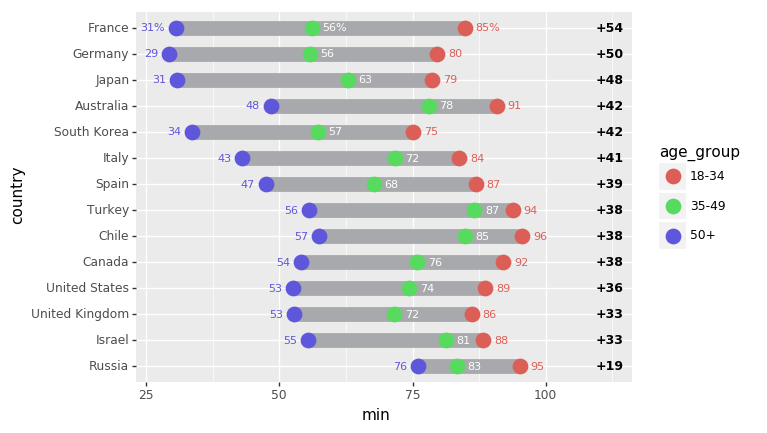

### VisPy

* Interactive 2D and 3D visualisation.
* GPU-accelerated rendering via OpenGL.
* See http://vispy.org/ (installable via conda - necessary to use the "conda-forge" channel if you are using Python 3.9)

### Bokeh
* More or less everything keeps getting more and more web-oriented, data-visualisation too...
* Bokeh is a browser-based interactive visualisation package that generates HTML + JavaScript interactive plots.
* You can create plots in Bokeh using the bokeh package.
* You can also convert existing Matplotlib-based figures to Bokeh (not all features are compatible - see `bokeh.mpl.to_bokeh`).
* See http://bokeh.pydata.org and https://docs.bokeh.org/en/latest/docs/first_steps.html (installable via Anaconda).
* *Example: https://demo.bokeh.org/selection_histogram*

# Data Storage

## Scientific computing storage

Hierarchical Data Format (HDF5)

* When we are dealing with large and/or complicated data, we probably need something more efficient and versatile than `NumPy`’s storage functions.
* The HDF Group has developed and are supporting the HDF data format.
* HDF5 is widely used for scientific data management.
* A flexible and costumisable data format, a bit like XML, which can contain binary data.
* https://www.hdfgroup.org/solutions/hdf5

### Python interfaces

Python has (at least) two interfaces to HDF5:

* `h5py`

  Low-level interface that “is an attempt to map the HDF5 feature set to NumPy as closely as possible” [`h5py` FAQ](http://docs.h5py.org/en/latest/faq.html#what-s-the-difference-between-h5py-and-pytables).
* `pytables`

  High-level (more abstract) interface to HDF5 combined with NumPy [`pytables` FAQ](http://www.pytables.org/FAQ.html#how-does-pytables-compare-with-the-h5py-project).
* Also HDF storage functionality as part of Pandas, *as we saw briefly*.

### h5py

* Highly scalable: laptop $\rightarrow$ super-computer.
* Not always multiprocessing-enabled but the standard includes it.
* We can extract parts of the dataset without the overhead of having to read the entire dataset.

Let us try it...

Create data set and save to file

In [29]:
import h5py
A = np.random.normal(size = (1, 3))
f = h5py.File('h5py.hdf5', 'w')
f.create_dataset('RND', data = A)
f.close()

Read data from file

In [30]:
f = h5py.File('h5py.hdf5', 'r')
B = f['RND'][...]

In [31]:
A

array([[ 1.50175106, -0.15382445,  0.98105378]])

In [32]:
B

array([[ 1.50175106, -0.15382445,  0.98105378]])

### pytables

* Built on top of HDF5 $\rightarrow$ has all the benefits.
* More abstract, higher-level interface.

Let us skip this for now, but this example could be good to have for future reference.

This is an example notebook by Francesc Alted from http://pytables.org/download/PyData2012-NYC.tar.gz (no longer available), slightly modified by me.

In [33]:
import tables as tb

Create a new file

In [34]:
f = tb.open_file('pytables.hdf5', 'w')

Create a NumPy array

In [35]:
A = np.arange(100).reshape(20,5)

Save the array

In [36]:
f.create_array(f.root, 'array1', A)

/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

See data

In [37]:
f.root.array1[...]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64],
       [65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74],
       [75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84],
       [85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94],
       [95, 96, 97, 98, 99]])

Select some data areas

In [38]:
B = f.root.array1
B[1:10:3,2:5]

array([[ 7,  8,  9],
       [22, 23, 24],
       [37, 38, 39]])

In [39]:
np.all(B[1:10:3,2:5] == A[1:10:3,2:5])

True

Create another array

In [40]:
C = f.create_array(f.root, "array2", np.arange(10))

In [41]:
np.all(C == np.arange(10))

True

In [42]:
ls -l pytables.hdf5

-rw-r--r-- 1 shei shei 96 Jun 13 14:29 pytables.hdf5


Flush data to the file (very important to keep all your data safe!)

In [43]:
f.flush()

In [44]:
ls -l pytables.hdf5

-rw-r--r-- 1 shei shei 2928 Jun 13 14:29 pytables.hdf5


Close access to file

In [45]:
f.close()
B[:]

ClosedNodeError: the node object is closed

In [ ]:
B

# Additional Scientific Packages

## SymPy

* So far we have been dealing exclusively with numerical computations. . . Python’s `math` or `NumPy`.
* Python can also handle symbolic mathematics thanks to the package `SymPy`.
* For further introduction see the very instructive tutorial: http://docs.sympy.org/latest/tutorial/.

## SciPy

* Builds on top of `NumPy` - further generality in some cases.
* ... provides higher level functionality in:
  * linear algebra $\rightarrow$ additional routines compared to `NumPy`
  * signal processing $\rightarrow$ filtering, convolution, matrix functionality ...
  * optimization $\rightarrow$ Nelder-Mead, Newton ...
  * math functions $\rightarrow$ integration, curve fitting, FFTs ...
  * statistics $\rightarrow$ co-variance, correlation, distributions ...

* ...
  * special functions $\rightarrow$ Bessel, hyperbolic ...
  * integration $\rightarrow$ Simpson, quadrature, ...
  * image processing $\rightarrow$ multi-dimensional (higher than 2) image processing
  * I/O $\rightarrow$ file input/output (e.g. Matlab files and WAV sound files).
  * ...

For documentation including tutorials etc. see: https://docs.scipy.org/doc/scipy/reference/

Numerical integration - `scipy.integrate`:

In [ ]:
import scipy.integrate
a, b, N = 0.0, 1.0, 9
x = np.linspace(a, b, N, endpoint=True)
def g(x): return x**2

In [ ]:
scipy.integrate.simps(g(x), x)

In [ ]:
scipy.integrate.trapz(g(x), x)

In [ ]:
scipy.integrate.romberg(g, a, b)

In [ ]:
scipy.integrate.quadrature(g, a, b)[0]

In [ ]:
scipy.integrate.quad(g, a, b)[0]

Root finding and optimization – `scipy.optimize`:

In [ ]:
import scipy.optimize
scipy.optimize.newton(lambda x: x**2 - 2, 0) # Secant method 

In [ ]:
N = 5
A = np.random.randn(N, N)
P = A.T.dot(A)
x0 = np.random.randn(N)
scipy.optimize.fmin_bfgs(lambda x: x.T.dot(P).dot(x), x0, lambda x: 2*P.dot(x))

# Summary

In today’s lecture we have:

* Introduced the Numerical Python (`NumPy`) package.
* Seen how to represent vectors and matrices as `NumPy` arrays in Python.
* Seen how to vectorise Python operations so as to work on entire arrays of data rather than one element at a time.
* Seen how to work with tabular data in Pandas
* Visualised data using the Matplotlib and Seaborn packages.
* Seen how to store and load data to/from files using different methods.
* Got an overview of additional scientific computing packages in the SciPy “ecosystem” as well as others.